<a href="https://colab.research.google.com/github/Steven-A3/DeepLearningZeroToAllColab/blob/master/RL_6_FrozenLake_QTable_Stochastic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 593kB 4.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 42.0.2
    Uninstalling setuptools-42.0.2:
      Successfully uninstalled setuptools-42.0.2


In [0]:
import gym
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
env = gym.make("FrozenLake-v0")

In [0]:
# Q 테이블 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])

# 학습 파라메터 설정
learning_rate = .85
dis = .99
num_episodes = 2000

# 에피소드별 리워드 목록 준비
rList = []
for i in range(num_episodes):
    # 환경을 초기화하고 첫번째 상태를 구한다.
    state = env.reset()
    rAll = 0
    done = False

    # Q-러닝 알고리즘
    while not done:
        # E-Greedy를 이용해 액션을 선택한다. 랜덤 노이즈 방식
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # 액션을 실행하고 새로운 상태와 보상을 얻는다.
        new_state, reward, done, _ = env.step(action)

        # Q 테이블을 새로 얻은 지식으로 업데이트 한다.
        Q[state, action] = (1 - learning_rate) * Q[state, action] \
            + learning_rate*(reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)

env.close()

In [0]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
for i in range(0,4):
    print(Q[i*4], Q[i*4+1], Q[i*4+2], Q[i*4+3])

Success rate: 0.6615
Final Q-Table Values
LEFT DOWN RIGHT UP
[0.60496773 0.01764961 0.02514004 0.01965344] [3.44237241e-04 4.09273837e-04 1.01301499e-02 5.71257284e-01] [0.01802545 0.01757248 0.00299109 0.74413527] [2.29029756e-03 6.95525365e-05 2.58436884e-03 4.94927303e-01]
[3.69144929e-01 1.53084709e-03 1.07239759e-03 2.13987052e-04] [0. 0. 0. 0.] [2.06025368e-05 4.79643489e-04 5.76123473e-01 4.10135194e-05] [0. 0. 0. 0.]
[0.00182002 0.00146575 0.00295822 0.70595727] [2.69759270e-03 3.72826145e-01 2.27660002e-04 3.02716949e-03] [7.26309381e-01 5.49279092e-06 3.69310143e-04 1.53096059e-03] [0. 0. 0. 0.]
[0. 0. 0. 0.] [0.00315298 0.         0.80566208 0.00248988] [0.        0.9851869 0.        0.       ] [0. 0. 0. 0.]


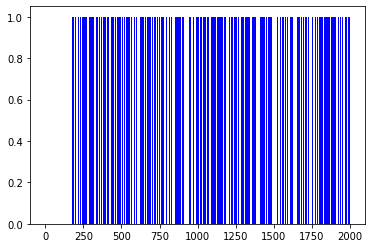

In [0]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
